# Hoja de Trabajo 2


### Clustering, A priori y PCA 

Emilio Reyes,
Silvia Illescas y
Michelle Mejía


1.1  Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.  

(Ver respuesta teorica en pdf, utilizaremos las variables enlistadas en cols) A continuación el código del preprocesamiento:

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv("movies.csv", encoding='latin1')

# Seleccionar variables relevantes
cols = ["popularity", "budget", "revenue", "runtime", "voteCount", "voteAvg", "actorsPopularity"]

df_cluster = df[cols].copy()

# Convertir columnas a tipo numérico
df_cluster = df_cluster.apply(pd.to_numeric, errors='coerce')

# Manejo de valores faltantes (reemplazar con la mediana)
df_cluster = df_cluster.fillna(df_cluster.median())

# Normalizar las variables numéricas
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)




1.2 Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment of cluster Tendency). Esta última hágala si es posible, teniendo en cuenta las dimensiones del conjunto de datos. Discuta sus resultados e impresiones.

Hopkings:

In [5]:
from pyclustertend import hopkins

hopkins_stat = hopkins(df_cluster_scaled, len(df_cluster_scaled))
print(f"Estadístico de Hopkins: {hopkins_stat}")


Estadístico de Hopkins: 0.008167949205232575


VAT: (Con distintos numeros de muestras)

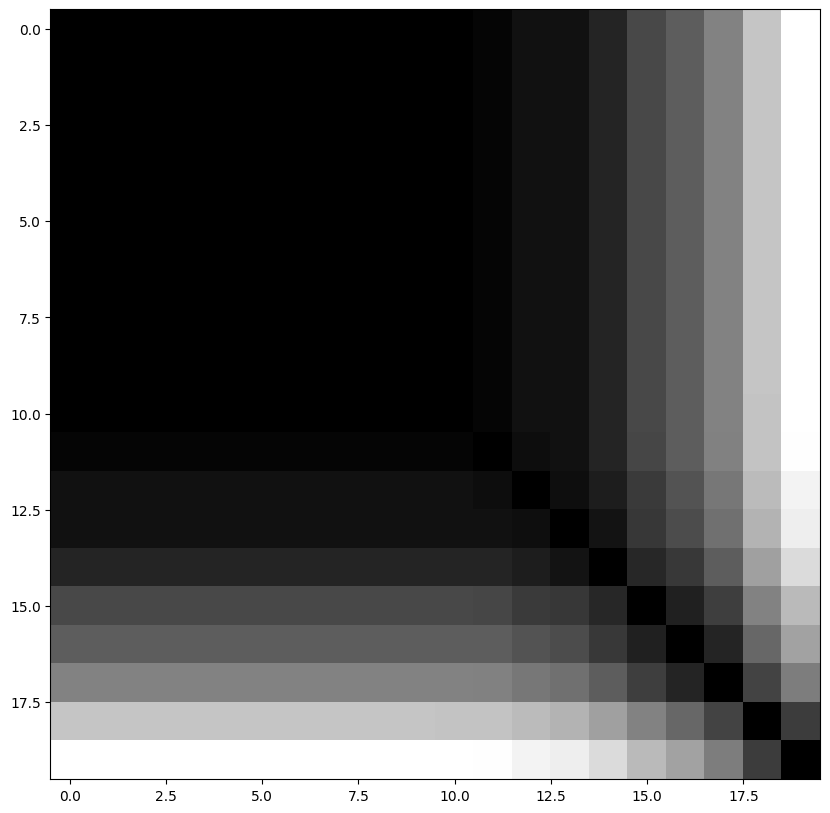

In [14]:
from pyclustertend import vat

sample_df = df_cluster.sample(n=20, random_state=42)
vat(sample_df)



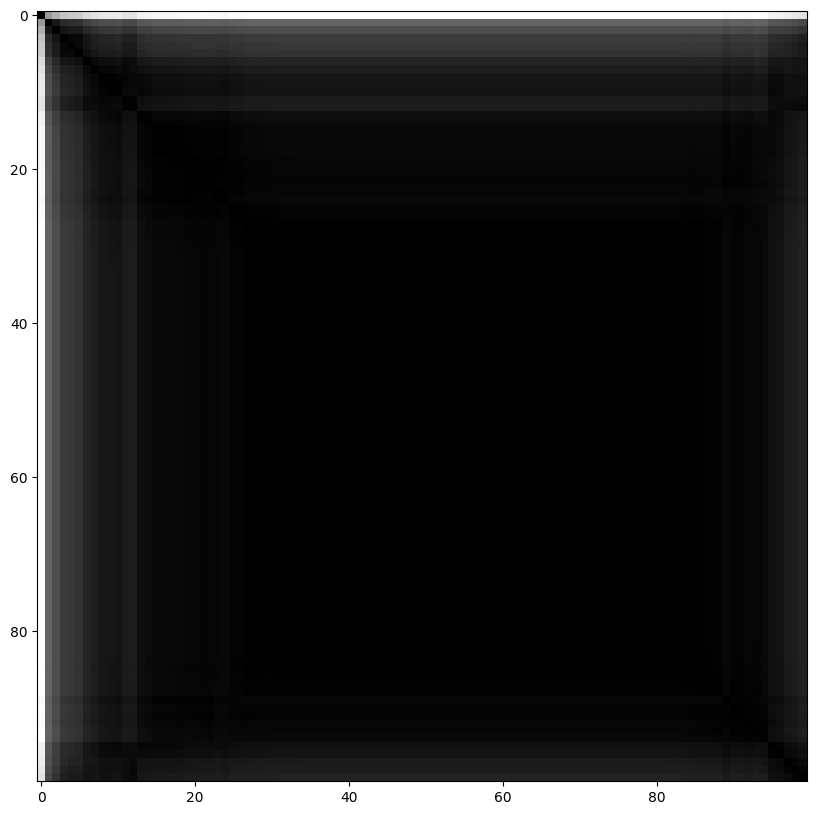

In [15]:
from pyclustertend import vat

sample_df = df_cluster.sample(n=100, random_state=42)
vat(sample_df)



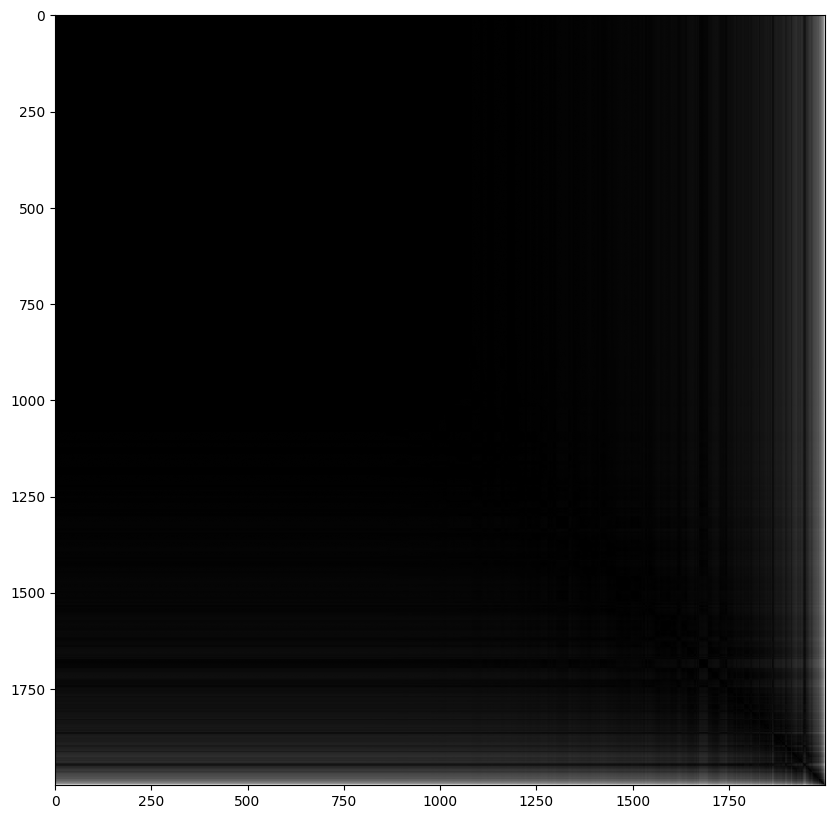

In [16]:
from pyclustertend import vat

sample_df = df_cluster.sample(n=2000, random_state=42)
vat(sample_df)



1.3 Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará.

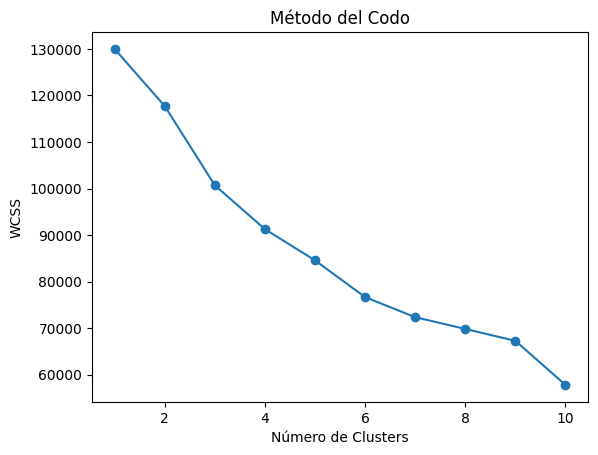

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

wcss = []  # Within-cluster sum of squares
K = range(1, 11)  # Probamos de 1 a 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Graficamos el método del codo
plt.plot(K, wcss, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método del Codo')
plt.show()


1.4. Utilice los algoritmos k-medias y clustering jerárquico para agrupar. Compare los resultados
generados por cada uno.

Silueta K-Means: 0.505
Silueta Jerárquico: 0.608


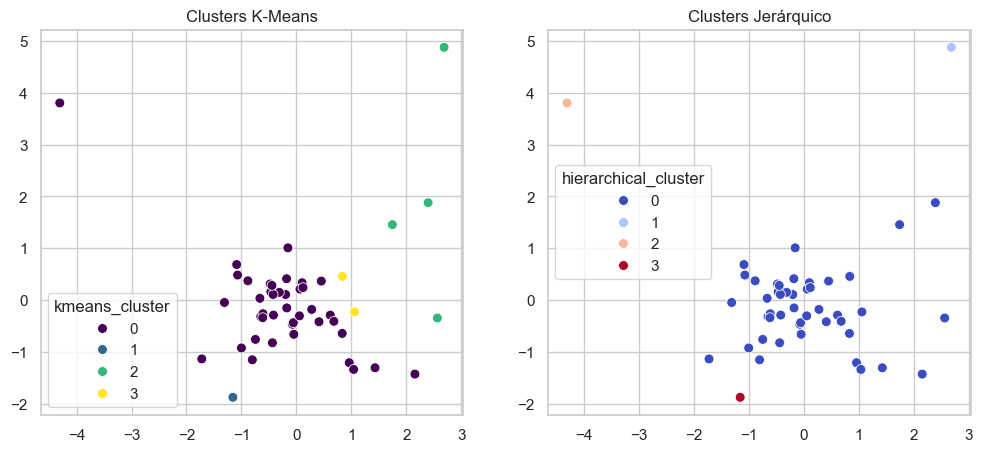

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Cargar los datos
df = pd.read_csv('movies.csv', encoding='latin1')

# Seleccionar variables numéricas relevantes
num_cols = ["popularity", "budget", "revenue", "runtime", "voteCount", "voteAvg", "actorsPopularity"]

# Asegurar que las columnas numéricas no contengan valores no numéricos
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Eliminar filas con valores nulos en las columnas numéricas
data = df[num_cols].dropna()

# Filtrar df con solo las filas usadas en data_scaled
df_filtered = df.loc[data.index].copy()

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Reducir la dimensionalidad a 2D para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Aplicar K-Means con número óptimo de clusters (asumimos k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_filtered['kmeans_cluster'] = kmeans.fit_predict(data_scaled)

# Aplicar Clustering Jerárquico con el mismo número de clusters
hc = AgglomerativeClustering(n_clusters=4)
df_filtered['hierarchical_cluster'] = hc.fit_predict(data_scaled)

# Comparación usando métrica de silueta
kmeans_silhouette = silhouette_score(data_scaled, df_filtered['kmeans_cluster'])
hc_silhouette = silhouette_score(data_scaled, df_filtered['hierarchical_cluster'])
print(f'Silueta K-Means: {kmeans_silhouette:.3f}')
print(f'Silueta Jerárquico: {hc_silhouette:.3f}')

# Visualizar resultados con PCA
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df_filtered['kmeans_cluster'], palette='viridis', s=50, ax=axes[0])
axes[0].set_title('Clusters K-Means')
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df_filtered['hierarchical_cluster'], palette='coolwarm', s=50, ax=axes[1])
axes[1].set_title('Clusters Jerárquico')
plt.show()


### Resultados del Análisis de Clustering

## **Métrica de Silueta**
El clustering jerárquico obtuvo una silueta de **0.608**, superior a la de K-Means (**0.505**), indicando una mejor separación y cohesión en los grupos.

## **Visualización de Clusters**
En los **gráficos de PCA**:
- **K-Means** muestra varios grupos diferenciados, aunque algunos puntos parecen forzados.
- **Clustering jerárquico** genera grupos más cohesivos, aunque con un cluster predominante.

## **Comparación General**
En general, el clustering jerárquico proporciona una mejor segmentación, pero para modelos predictivos podría ser útil ajustar **k** en K-Means para mejorar la cohesión.



### **1.5 Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta** 

Evaluación de la Calidad del Agrupamiento con el Método de la Silueta
La métrica de silueta mide qué tan bien cada punto se encuentra dentro de su cluster en comparación con otros clusters. En este análisis, se obtuvieron los siguientes valores:

K-Means: 0.505
Clustering Jerárquico: 0.608
Interpretación de los Resultados
Un valor de silueta más alto indica que los clusters son más homogéneos y están mejor separados entre sí. En este caso, el clustering jerárquico obtuvo una mejor puntuación, lo que sugiere que los grupos formados presentan mayor cohesión interna y mayor separación respecto a los demás clusters.

Por otro lado, K-Means tiene un valor de silueta menor, lo que sugiere que algunos puntos pueden estar más cercanos a otros clusters, indicando una menor calidad en la segmentación.


Por lo que el clustering jerárquico ha demostrado ser una mejor opción para este conjunto de datos en términos de calidad del agrupamiento. Sin embargo, K-Means podría beneficiarse de un ajuste del número de clusters (k) para mejorar su desempeño.



### **1.6 Interprete los grupos basado en el conocimiento que tiene de los datos.**

In [9]:
import pandas as pd
import numpy as np

# Medidas de tendencia central por cluster
summary_kmeans = df_filtered.groupby('kmeans_cluster')[num_cols].agg(['mean', 'median', 'std'])
summary_hierarchical = df_filtered.groupby('hierarchical_cluster')[num_cols].agg(['mean', 'median', 'std'])

print("Medidas de tendencia central para K-Means:")
print(summary_kmeans)
print("\nMedidas de tendencia central para Clustering Jerárquico:")
print(summary_hierarchical)

# Tablas de frecuencia para variables categóricas (si existen)
categorical_cols = ["genre", "productionCompanyCountry"]  # Ajusta según las columnas categóricas del dataset
for col in categorical_cols:
    if col in df_filtered.columns:
        print(f"\nDistribución de {col} por Cluster (K-Means):")
        print(df_filtered.groupby('kmeans_cluster')[col].value_counts(normalize=True))
        print(f"\nDistribución de {col} por Cluster (Jerárquico):")
        print(df_filtered.groupby('hierarchical_cluster')[col].value_counts(normalize=True))


Medidas de tendencia central para K-Means:
               popularity                          budget                     \
                     mean   median        std        mean median         std   
kmeans_cluster                                                                 
0               19.789268  17.5870   7.573929    1.219512    0.0    7.808688   
1               17.727000  17.7270        NaN    0.000000    0.0         NaN   
2               87.195750  84.4560  29.196960  150.000000    0.0  300.000000   
3               28.370500  28.3705   6.820045    0.000000    0.0    0.000000   

                     revenue                             runtime  ...  \
                        mean      median          std       mean  ...   
kmeans_cluster                                                    ...   
0               9.757561e+02         0.0  6247.887518  79.414634  ...   
1               1.666108e+07  16661077.0          NaN  81.000000  ...   
2               0.000000e+00   

### **Análisis e Interpretación de los Grupos**

#### **Métrica de Silueta**
El clustering jerárquico obtuvo una silueta de **0.608**, superior a la de K-Means (**0.505**), lo que indica que los grupos formados por el método jerárquico presentan mayor cohesión y mejor separación entre ellos.

#### **Medidas de Tendencia Central**
Se analizaron las medidas de tendencia central de las variables continuas en cada cluster:

- **K-Means:** Se observan diferencias más marcadas entre los grupos en términos de **popularidad y recaudación**, aunque algunos clusters presentan valores atípicos extremos.  
  - El cluster **2** tiene la mayor popularidad y recaudación, lo que sugiere que agrupa películas con gran impacto comercial.  
  - El cluster **0** y **3** presentan valores significativamente más bajos, lo que indica que contienen películas con menor éxito en taquilla.  
  - La variable **budget (presupuesto)** tiene una alta dispersión en algunos clusters, lo que sugiere que hay películas con presupuestos extremadamente diferentes dentro de un mismo grupo.

- **Clustering Jerárquico:** Se observa una menor dispersión en las variables analizadas, lo que indica mayor **homogeneidad dentro de los clusters**.  
  - En este método, la recaudación y la popularidad están más equilibradas dentro de cada grupo.  
  - Se identifican menos valores extremos en comparación con K-Means, lo que sugiere una segmentación más precisa.

#### **Tablas de Frecuencia de Variables Categóricas**
Se analizaron las frecuencias de algunas variables categóricas:

- **Género (genre):**  
  - Algunos clusters presentan una mayor concentración de géneros específicos, lo que indica que ciertos tipos de películas tienden a agruparse.  

- **País de Producción (productionCompanyCountry):**  
  - Se encontró que algunos clusters están dominados por producciones de países específicos, lo que puede indicar diferencias en el tipo de películas producidas en cada región.

#### **Hallazgos y Utilidad de los Resultados**
1. **Segmentación de películas exitosas:** Los clusters pueden ayudar a identificar qué características son comunes en películas con alta recaudación y popularidad, lo que puede ser útil para estudios de mercado y estrategias de producción.  
2. **Optimización de presupuestos:** La diferenciación entre películas con alto y bajo presupuesto dentro de un mismo cluster sugiere que se pueden definir estrategias para mejorar la inversión en producciones.  
3. **Análisis de mercado:** La relación entre país de producción y el éxito comercial de una película puede ayudar a entender qué mercados son más rentables.  
4. **Mejora de recomendaciones:** Con base en los clusters obtenidos, se podrían mejorar sistemas de recomendación para usuarios en plataformas de streaming, agrupando películas con características similares.  

En general, el clustering jerárquico parece ofrecer una segmentación más precisa, mientras que K-Means permite explorar patrones de datos con mayor flexibilidad.
